# TP 3 - Logistique Regression

In [20]:
import numpy as np
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

In [3]:
file_path = os.path.join('Data and article for the practical session-20241024', 'Alzheimer_Webster.txt')
data = pd.read_csv(file_path, delimiter=" ")

In [4]:
X = data.drop('Y', axis=1)
y  = data['Y']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
def get_pred_report(y_pred, y):
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

    accuracy = accuracy_score(y, y_pred)
    conf_matrix = confusion_matrix(y, y_pred)
    class_report = classification_report(y, y_pred)
    
    print(f"Accuracy: {accuracy}")
    print(f"Confusion matrix:\n{conf_matrix}")
    print(f"Classification report:\n{class_report}")

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8356164383561644
Confusion Matrix:
[[33  7]
 [ 5 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85        40
           1       0.80      0.85      0.82        33

    accuracy                           0.84        73
   macro avg       0.83      0.84      0.83        73
weighted avg       0.84      0.84      0.84        73



$
\min ||Ax + b||_2^2 + 1/C ||x||_2
$

## Checking for different penalizer values L2


In [11]:
param_grid = {'C' : np.logspace(-2, 2, 10)}

model = LogisticRegression(penalty='l2', max_iter=1000)
grid_search = GridSearchCV(model, param_grid, cv=5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02])})

In [12]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best parameters: {best_params}')
print(f'Best score: {best_score}')

Best parameters: {'C': np.float64(0.21544346900318834)}
Best score: 0.9209818819403857


In [15]:
get_pred_report(grid_search.predict(X_test), y_test)

Accuracy: 0.8493150684931506
Confusion matrix:
[[34  6]
 [ 5 28]]
Classification report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.82      0.85      0.84        33

    accuracy                           0.85        73
   macro avg       0.85      0.85      0.85        73
weighted avg       0.85      0.85      0.85        73



## Checking for different penalizer values L1

In [17]:
param_grid = {'C' : np.logspace(-2, 2, 10)}

model = LogisticRegression(penalty='l1', solver="liblinear", max_iter=1000)
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, penalty='l1',
                                          solver='liblinear'),
             param_grid={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02])})

In [18]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best parameters: {best_params}')
print(f'Best score: {best_score}')

Best parameters: {'C': np.float64(4.6415888336127775)}
Best score: 0.927761542957335


In [19]:
get_pred_report(grid_search.predict(X_test), y_test)

Accuracy: 0.8767123287671232
Confusion matrix:
[[35  5]
 [ 4 29]]
Classification report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        40
           1       0.85      0.88      0.87        33

    accuracy                           0.88        73
   macro avg       0.88      0.88      0.88        73
weighted avg       0.88      0.88      0.88        73



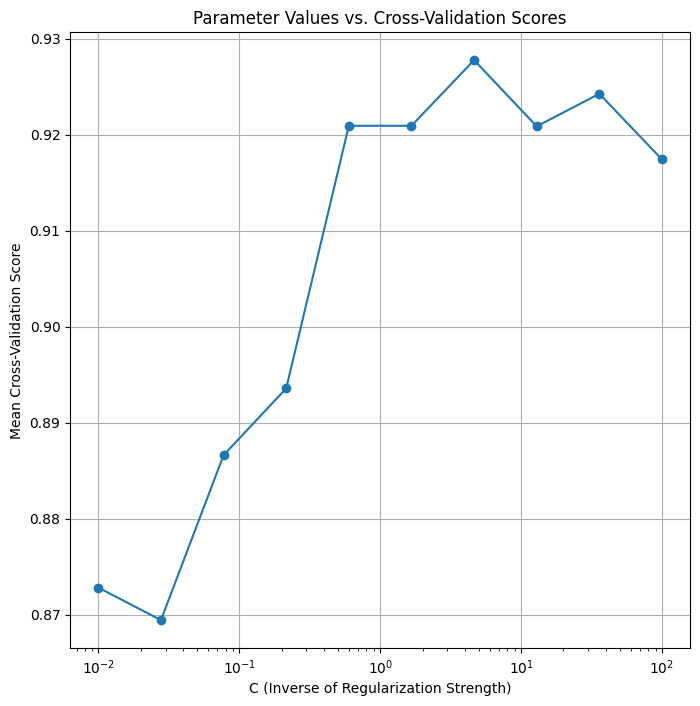

In [23]:
params_values = param_grid['C']
mean_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(8,8))
plt.plot(params_values, mean_scores, marker='o')
plt.xscale('log')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Mean Cross-Validation Score')
plt.title('Parameter Values vs. Cross-Validation Scores')
plt.grid(True)
plt.show()